# Actividad - Regresión Lineal

* **Nombre: Rommel Pacheco Hernández**
* **Matrícula:A01709035**

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio. <br>
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite. <br>
**Importante**:
  * Colocar nombres de ejes en gráficas.
  * Títulos en las gráficas.
  * Contestar cada pregunta.

Carga el conjunto de datos `presion.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [2]:
# Carga las librerías necesarias.
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [3]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving presion.csv to presion.csv
User uploaded file "presion.csv" with length 799 bytes


In [4]:

  df = pd.read_csv('presion.csv')
  df.head(6)

,Age,Average of ap_hi,Average of ap_lo
0,30,112.500000,72.500000
1,39,119.029340,88.229829
2,40,119.789630,85.858889
3,41,121.490862,90.344648
4,42,120.163872,89.887957
5,43,141.294203,93.388406


El conjunto de datos contiene información demográfica sobre los asegurados en una compañía de seguros:
* **Age**: Edad de la persona.
* **Average of ap_hi**: Promedio de presión alta.
* **Average of ap_lo**: Promedio de presión baja.

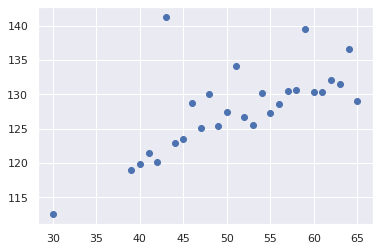

In [5]:
# Grafica la información de la edad y presión alta
plt.scatter(df['Age'], y=df['Average of ap_hi']);

Genera una regresión líneal para obtener una aproximación de la ecuación 
$$ y = ax + b $$
donde $ a $ se conoce comúnmente como **pendiente**, y $ b $ se conoce comúnmente como **intersección**, tanto para presión alta como la presión baja.

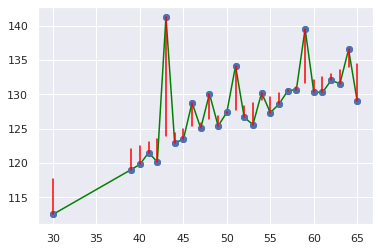

In [6]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión alta?
x = df['Age'].values
y = df['Average of ap_hi'].values
modelalta = LinearRegression(fit_intercept=True)
modelalta.fit(x[:,np.newaxis],df['Average of ap_hi'].values)

plt.scatter(x, y)
plt.plot(x ,y, color="green");
plt.plot(x, y, 'o')
plt.plot(np.vstack([x,x]), np.vstack([y, modelalta.predict(x[:, np.newaxis])]), color="red");

In [7]:
print("Model slope:    ", modelalta.coef_[0])
print("Model intercept:", modelalta.intercept_)

Model slope:     0.47769702977669154
Model intercept: 103.3969740964366


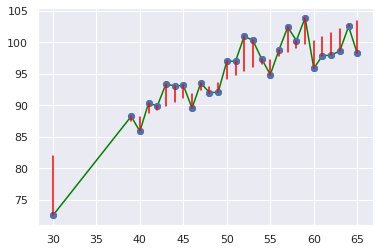

In [8]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión baja?
x = df['Age'].values
y = df['Average of ap_lo'].values
modelbajo = LinearRegression(fit_intercept=True)
modelbajo.fit(x[:,np.newaxis],df['Average of ap_lo'].values)



plt.scatter(x, y)
plt.plot(x ,y, color="green");
plt.plot(x, y, 'o')
plt.plot(np.vstack([x,x]), np.vstack([y, modelbajo.predict(x[:, np.newaxis])]), color="red");

In [9]:
print("Model slope:    ", modelbajo.coef_[0])
print("Model intercept:", modelbajo.intercept_)

Model slope:     0.6089810580238237
Model intercept: 63.726200409422745


Gráfica los datos reales contra los obtenidos con el modelo. Se debe visualizar los datos reales (azúl), recta del modelo (negro)y distancias entre ambos. (verde) 

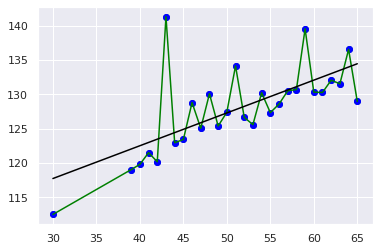

In [18]:
# Presión alta

x = df['Age'].values
y = df['Average of ap_hi'].values
plt.plot(x, y, color="green");

modelalta.fit(x[:,np.newaxis], y)
yfit_1 = modelalta.predict(x[:, np.newaxis],)

plt.scatter(x, y)
plt.plot(x, yfit_1, label='model1', color = "Black");

#Grafica original
plt.scatter(x, y, color = "Blue");



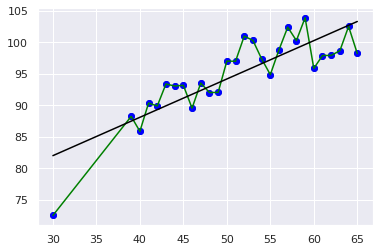

In [24]:
# Presión baja

x = df['Age'].values
y = df['Average of ap_lo'].values
plt.plot(x, y, color="green");

modelbajo.fit(x[:,np.newaxis], y)
yfit_2 = modelbajo.predict(x[:, np.newaxis],)

plt.scatter(x, y)
plt.plot(x, yfit_2, label='model1', color = "Black");

#Grafica original

plt.scatter(x, y, color = "Blue");


¿Cual es la presión arterial atal y baja para una persona de cierta edad? Genera dos funciones que calculen los anterior.

In [ ]:
def pressure_low(age):
  return modelbajo.predict([[age]])

query_age= 76
pressure_low(query_age)

array([110.00876082])

In [ ]:
def pressure_high(age):
  return modelalta.predict([[age]])

query_age= 76
pressure_high(query_age)

array([139.70194836])